In [1]:
#This script opens the citation dataset and perform calculations in patent level
#Renato Kogeyama

#Miami, Jan 28, 2020
#Script to calculate citations received by a patent
#citation_id with less than 3 characters have no meaning
#they are causing problems moving forward
#so here I drop them


In [2]:
import pandas as pd
import numpy as np
import re

import sys
sys.path.append('/home/rkogeyam/scripts/')
from sampler import sampler


In [3]:
%matplotlib inline

In [4]:
fname = r'/home/rkogeyam/PATENT_CITATION/data/cleanuspatentcitation.csv'
dst = '/home/rkogeyam/PATENT_CITATION/data/cit_made.csv'

In [5]:
%%time
df=pd.read_csv(fname, usecols=['patent_id','citation_id','date'], dtype=object)

# sample_size=100
# df=sampler(fname, sample_size, sep='\t')

CPU times: user 2min 44s, sys: 10.2 s, total: 2min 54s
Wall time: 2min 54s


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91453297 entries, 0 to 91453296
Data columns (total 3 columns):
patent_id      object
citation_id    object
date           object
dtypes: object(3)
memory usage: 2.0+ GB


In [7]:
df.head()

,patent_id,citation_id,date
0,9009250,8127342,2012-02-01
1,9643605,5471515,1995-11-01
2,5354551,4875247,1989-10-01
3,D786922,D718330,2014-11-01
4,D490798,D190749,1961-06-01


In [8]:
%%time
#cited patents registers total citations received 

df=df.groupby(['patent_id']).count().iloc[:,0].reset_index() #Series, patent-level
# cited_patents.dropna(0, inplace=True) #Series, '0' implies that rows are dropped

#I should check this, because later I make citation back as index for merging purposes
# cited_patents=cited_patents.reset_index() #Dataframe

CPU times: user 1min 9s, sys: 1.3 s, total: 1min 10s
Wall time: 1min 10s


In [9]:
df.rename(columns={'citation_id': 'cit_made'}, inplace=True)

In [10]:
df.head()

,patent_id,cit_made
0,3930271,2
1,3930272,11
2,3930273,8
3,3930274,3
4,3930275,2


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188752 entries, 0 to 6188751
Data columns (total 2 columns):
patent_id    object
cit_made     int64
dtypes: int64(1), object(1)
memory usage: 94.4+ MB


In [12]:
df['cit_made'].value_counts().sort_index()

0           10
1       419711
2       496011
3       537358
4       538330
5       500402
6       443246
7       381340
8       327748
9       280490
10      242257
11      218139
12      173214
13      155067
14      124667
15      108576
16       96327
17       84373
18       75100
19       66434
20       59889
21       53403
22       48621
23       43606
24       39211
25       35809
26       32840
27       29153
28       26357
29       24542
         ...  
2654         2
2656         1
2668         1
2676         1
2677         2
2679         1
2680         2
2686         3
2687         2
2688         1
2689         1
2692         1
2693         3
2695         2
2696         3
2697         2
2698         1
2700         1
2703         1
2706         2
2707         2
2708         1
2709         1
2822         1
2844         1
2876         1
2914         1
3018         1
5802         1
5811         1
Name: cit_made, dtype: int64

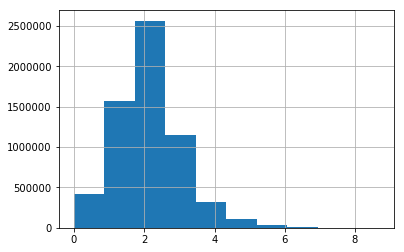

In [13]:
np.log(df['cit_made'].apply(lambda x: x+1)).hist()

In [14]:
df['patent_id'].str.len().value_counts().sort_index()

6       1077
7    6186223
8       1452
Name: patent_id, dtype: int64

In [15]:
df=df[
df['patent_id'].apply(lambda x: len(x)>4)
  ]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6188752 entries, 0 to 6188751
Data columns (total 2 columns):
patent_id    object
cit_made     int64
dtypes: int64(1), object(1)
memory usage: 141.6+ MB


In [17]:
%%time
df.to_csv(dst)

CPU times: user 16.6 s, sys: 63 ms, total: 16.7 s
Wall time: 16.8 s
